<a href="https://colab.research.google.com/github/Umutyagizyerli/kvasir-classification/blob/main/KVASIR_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    vertical_flip=True,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'Desktop/kvasir-dataset-v2/train',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    'Desktop/kvasir-dataset-v2/test',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')

Found 1600 images belonging to 8 classes.


In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Sınıf sayısı 8

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 2056      
Total params: 21,139,528
Trainable params: 21,139,528
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)


Epoch 1/10
200/200 [==============================] - 2360s 12s/step - loss: 1.0717 - accuracy: 0.5256 - val_loss: 0.5737 - val_accuracy: 0.7487
Epoch 2/10
200/200 [==============================] - 2229s 11s/step - loss: 0.5847 - accuracy: 0.7584 - val_loss: 0.4605 - val_accuracy: 0.8231
Epoch 3/10
200/200 [==============================] - 2254s 11s/step - loss: 0.4131 - accuracy: 0.8355 - val_loss: 0.3665 - val_accuracy: 0.8581
Epoch 4/10
200/200 [==============================] - 2231s 11s/step - loss: 0.3621 - accuracy: 0.8545 - val_loss: 0.3473 - val_accuracy: 0.8544
Epoch 5/10
200/200 [==============================] - 2235s 11s/step - loss: 0.3342 - accuracy: 0.8659 - val_loss: 0.2802 - val_accuracy: 0.8900
Epoch 6/10
200/200 [==============================] - 2241s 11s/step - loss: 0.2836 - accuracy: 0.8855 - val_loss: 0.4822 - val_accuracy: 0.8475
Epoch 7/10
200/200 [==============================] - 2960s 15s/step - loss: 0.2896 - accuracy: 0.8805 - val_loss: 0.3783 - val_ac

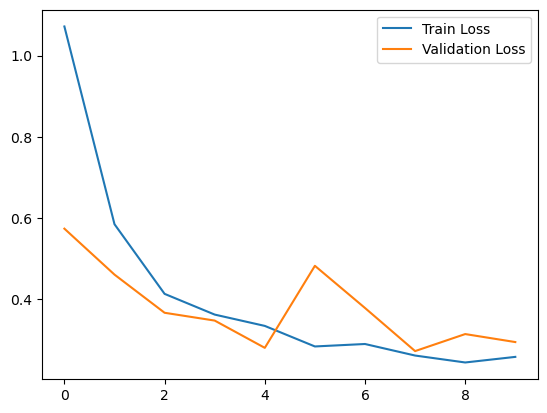

In [ ]:
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

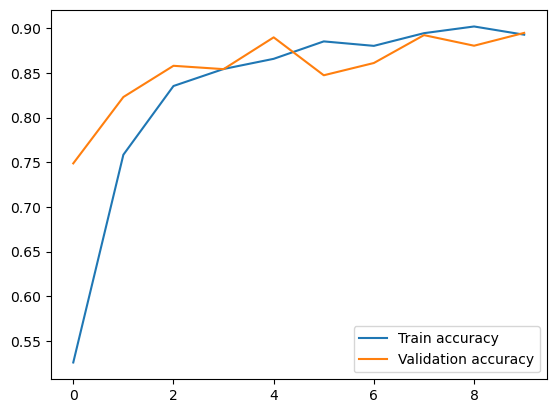

In [ ]:
plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

50/50 [==============================] - 191s 4s/step - loss: 0.2944 - accuracy: 0.8950
Test Loss: 0.29440662264823914
Test Accuracy: 0.8949999809265137


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print('Classification Report:')
print(report)

Classification Report:
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.78      0.98      0.87       200
dyed-resection-margins       0.97      0.73      0.83       200
           esophagitis       0.87      0.69      0.77       200
          normal-cecum       0.98      0.96      0.97       200
        normal-pylorus       0.96      1.00      0.98       200
         normal-z-line       0.74      0.89      0.81       200
                polyps       0.94      0.96      0.95       200
    ulcerative-colitis       0.98      0.95      0.96       200

              accuracy                           0.90      1600
             macro avg       0.90      0.90      0.89      1600
          weighted avg       0.90      0.90      0.89      1600



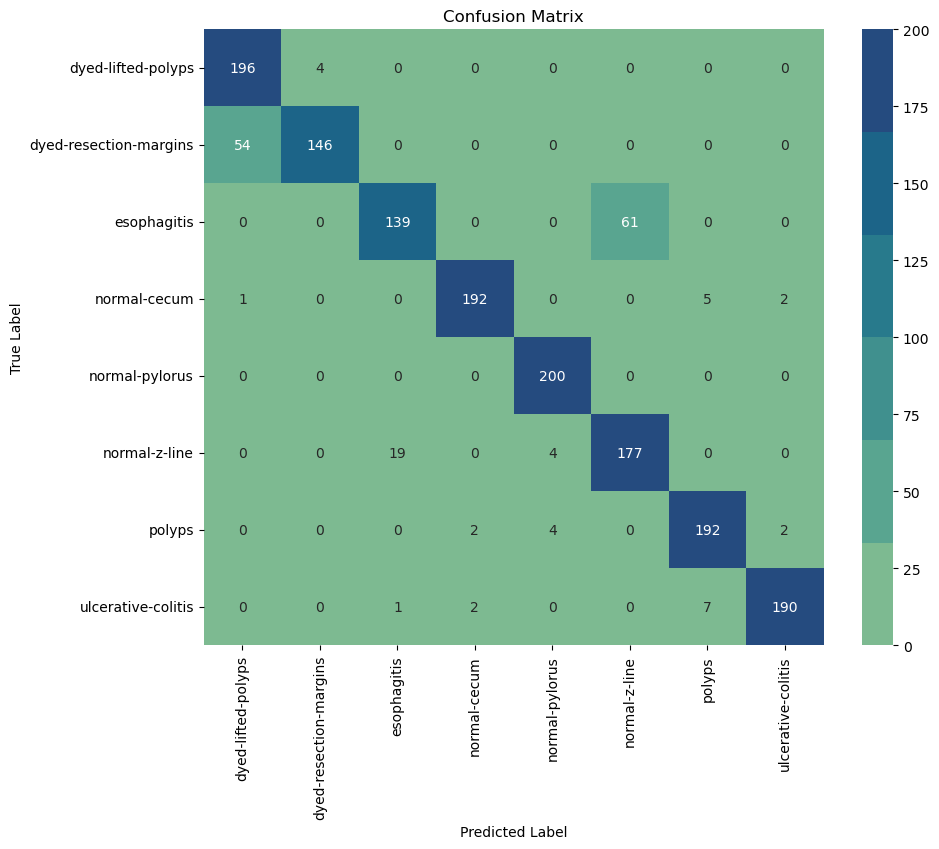

In [ ]:
test_generator.reset()

predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

cmap = sns.color_palette("crest")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save_weights("kvasır_vgg16.h5")

In [ ]:
import json
with open ("kvasır_vgg16_history.json","w") as f:
    json.dump(history.history,f)